In [1]:
%matplotlib widget

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

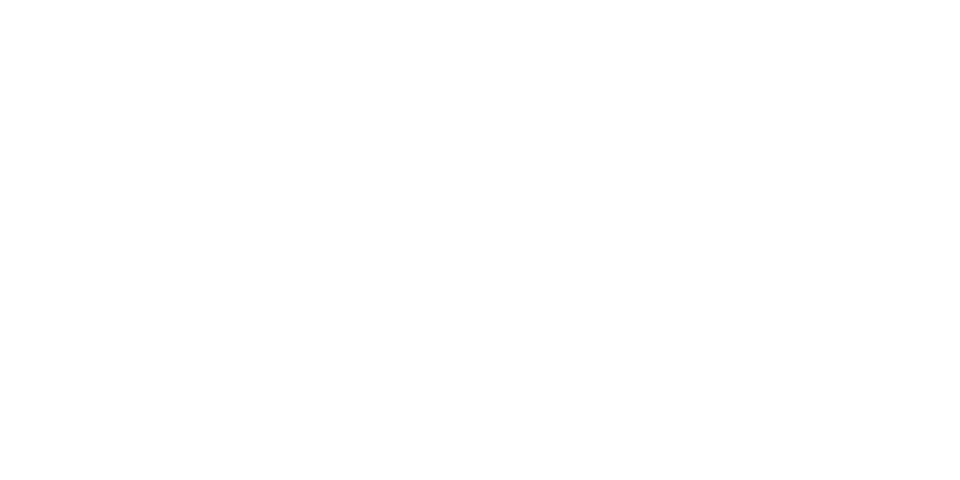

In [3]:
fig = plt.figure(figsize=plt.figaspect(0.5))
# ax = plt.axes(projection='3d')

In [4]:
# ax = fig.add_subplot(111, projection="3d")
# ax = Axes3D(fig)

In [4]:
# t-pose
lm3d = [
    (0.003078, -0.667975, -0.267332),
    (0.020557, -0.683516, -0.251943),
    (0.019744, -0.686642, -0.242031),
    (0.017954, -0.685843, -0.243091),
    (-0.000915, -0.696458, -0.264135),
    (-0.001521, -0.696489, -0.274049),
    (0.002992, -0.682004, -0.254600),
    (0.088206, -0.661148, -0.141065),
    (-0.062904, -0.623156, -0.139453),
    (0.045842, -0.651680, -0.216144),
    (0.001550, -0.620526, -0.239920),
    (0.181401, -0.520463, -0.022057),
    (-0.116183, -0.584683, 0.009264),
    (0.375057, -0.565684, 0.089848),
    (-0.269321, -0.503407, -0.090270),
    (0.576879, -0.592321, 0.244059),
    (-0.470051, -0.515195, -0.217604),
    (0.615486, -0.613784, 0.279226),
    (-0.502309, -0.530816, -0.263541),
    (0.617022, -0.622687, 0.240268),
    (-0.488317, -0.562262, -0.281013),
    (0.593634, -0.578612, 0.228765),
    (-0.479285, -0.526261, -0.235431),
    (0.084485, -0.001159, 0.021276),
    (-0.082767, -0.002969, -0.017902),
    (0.078238, 0.396516, 0.067502),
    (-0.046975, 0.335772, 0.027505),
    (0.051774, 0.728949, 0.278282),
    (-0.071919, 0.715674, 0.239251),
    (0.024132, 0.765771, 0.303258),
    (-0.075458, 0.751133, 0.221954),
    (0.023557, 0.819632, 0.260791),
    (-0.121343, 0.794022, 0.165045),
    (0.000859, -0.002064, 0.001687),
    (0.032609, -0.552573, -0.006397),
    (0.000859, -0.002064, 0.001687)
]

In [5]:
# v-pose
vlm3d = [
    (0.008416, -0.634527, -0.260950),
    (0.023932, -0.649963, -0.246623),
    (0.021935, -0.652791, -0.236793),
    (0.020602, -0.652721, -0.238632),
    (-0.001918, -0.657420, -0.264558),
    (-0.000328, -0.658103, -0.277128),
    (0.003014, -0.644046, -0.256564),
    (0.074619, -0.637829, -0.145254),
    (-0.067449, -0.582788, -0.155069),
    (0.042210, -0.618381, -0.213900),
    (0.003060, -0.583580, -0.246246),
    (0.167898, -0.529274, -0.047496),
    (-0.118491, -0.578913, -0.044215),
    (0.295250, -0.692503, -0.095195),
    (-0.226583, -0.653058, -0.189032),
    (0.388551, -0.875161, -0.130593),
    (-0.324218, -0.868572, -0.289152),
    (0.396092, -0.923208, -0.140909),
    (-0.326189, -0.924808, -0.353246),
    (0.378265, -0.947431, -0.157319),
    (-0.294475, -0.980209, -0.352735),
    (0.389180, -0.872154, -0.144568),
    (-0.318777, -0.897202, -0.299864),
    (0.084799, -0.005909, 0.027898),
    (-0.083190, 0.001052, -0.025328),
    (0.078926, 0.383440, 0.000040),
    (-0.046097, 0.336393, -0.012527),
    (0.061945, 0.736835, 0.103868),
    (-0.085045, 0.703524, 0.142972),
    (0.035896, 0.770580, 0.119718),
    (-0.089242, 0.737073, 0.120542),
    (0.031568, 0.807700, 0.066122),
    (-0.126434, 0.764138, 0.051662),
    (0.000804, -0.002429, 0.001285),
    (0.024704, -0.554094, -0.045855),
    (0.000804, -0.002429, 0.001285)
]

In [10]:
# kalidokit
# v-pose
# [11] rightarm
# quat: 
      # _x:  0.11674266906214248
      # _y:  -0.3148348665886159
      # _z:  -0.22118826923595844
      # _w:  0.9156013900998495

# mediapipe rotations
# [11]
# rotation point (11): quat(0.343522, {-0.786806, 0.375880, -0.348773})

In [7]:
def plot_world_landmarks(plt, ax, lm3d):
    face_index_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    right_arm_index_list = [11, 13, 15, 17, 19, 21]
    left_arm_index_list = [12, 14, 16, 18, 20, 22]
    right_body_side_index_list = [11, 23, 25, 27, 29, 31]
    left_body_side_index_list = [12, 24, 26, 28, 30, 32]
    shoulder_index_list = [11, 12]
    waist_index_list = [23, 24]
    # 顔
    face_x, face_y, face_z = [], [], []
    for index in face_index_list:
        point = lm3d[index]
        face_x.append(point[0])
        face_y.append(point[2])
        face_z.append(point[1] * (-1))
        # face_x.append(point[0])
        # face_y.append(point[1])
        # face_z.append(point[2])
    # 肩
    shoulder_x, shoulder_y, shoulder_z = [], [], []
    for index in shoulder_index_list:
        point = lm3d[index]
        shoulder_x.append(point[0])
        shoulder_y.append(point[2])
        shoulder_z.append(point[1] * (-1))
        # shoulder_x.append(point[0])
        # shoulder_y.append(point[1])
        # shoulder_z.append(point[2])
    # 腰
    waist_x, waist_y, waist_z = [], [], []
    for index in waist_index_list:
        point = lm3d[index]
        waist_x.append(point[0])
        waist_y.append(point[2])
        waist_z.append(point[1] * (-1))
        # waist_x.append(point[0])
        # waist_y.append(point[1])
        # waist_z.append(point[2])
    left_arm_x, left_arm_y, left_arm_z = [], [], []
    for index in left_arm_index_list:
        point = lm3d[index]
        left_arm_x.append(point[0])
        left_arm_y.append(point[2])
        left_arm_z.append(point[1] * (-1))
        # left_arm_x.append(point[0])
        # left_arm_y.append(point[1])
        # left_arm_z.append(point[2])
    right_arm_x, right_arm_y, right_arm_z = [], [], []
    for index in right_arm_index_list:
        point = lm3d[index]
        right_arm_x.append(point[0])
        right_arm_y.append(point[2])
        right_arm_z.append(point[1] * (-1))
        # right_arm_x.append(point[0])
        # right_arm_y.append(point[1])
        # right_arm_z.append(point[2])
    # 右半身
    right_body_side_x, right_body_side_y, right_body_side_z = [], [], []
    for index in right_body_side_index_list:
        point = lm3d[index]
        right_body_side_x.append(point[0])
        right_body_side_y.append(point[2])
        right_body_side_z.append(point[1] * (-1))
        # right_body_side_x.append(point[0])
        # right_body_side_y.append(point[1])
        # right_body_side_z.append(point[2])
    # 左半身
    left_body_side_x, left_body_side_y, left_body_side_z = [], [], []
    for index in left_body_side_index_list:
        point = lm3d[index]
        left_body_side_x.append(point[0])
        left_body_side_y.append(point[2])
        left_body_side_z.append(point[1] * (-1))
        # left_body_side_x.append(point[0])
        # left_body_side_y.append(point[1])
        # left_body_side_z.append(point[2])
    # ax = plt.axes(projection='3d')
    # fig = plt.figure()
    # ax = Axes3D(fig)
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(-1, 1)
    ax.scatter(face_x, face_y, face_z)
    ax.plot3D(left_arm_x, left_arm_y, left_arm_z)
    ax.scatter(left_arm_x, left_arm_y, left_arm_z, color='green')
    ax.plot3D(right_arm_x, right_arm_y, right_arm_z)
    ax.scatter(right_arm_x, right_arm_y, right_arm_z, color='blue')
    ax.plot(right_body_side_x, right_body_side_y, right_body_side_z)
    ax.plot(left_body_side_x, left_body_side_y, left_body_side_z)
    ax.plot(shoulder_x, shoulder_y, shoulder_z)
    ax.plot(waist_x, waist_y, waist_z)
    plt.show()

In [8]:
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

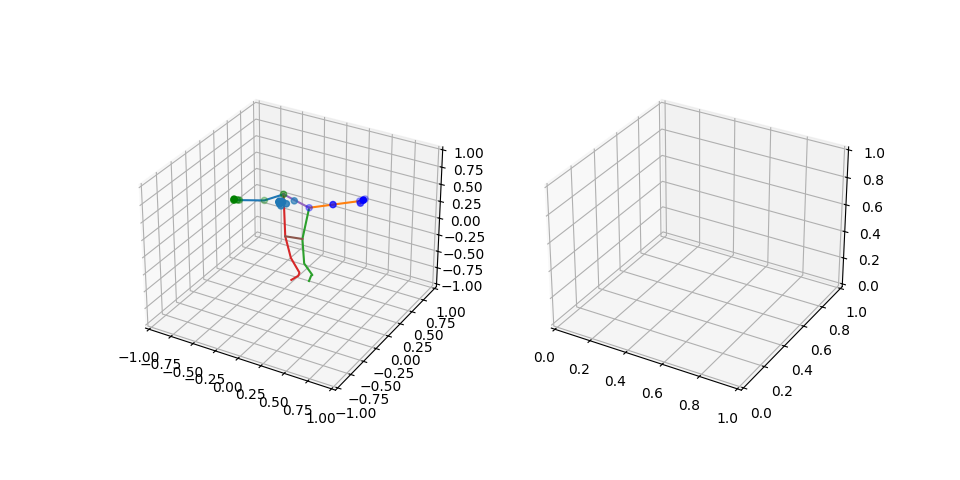

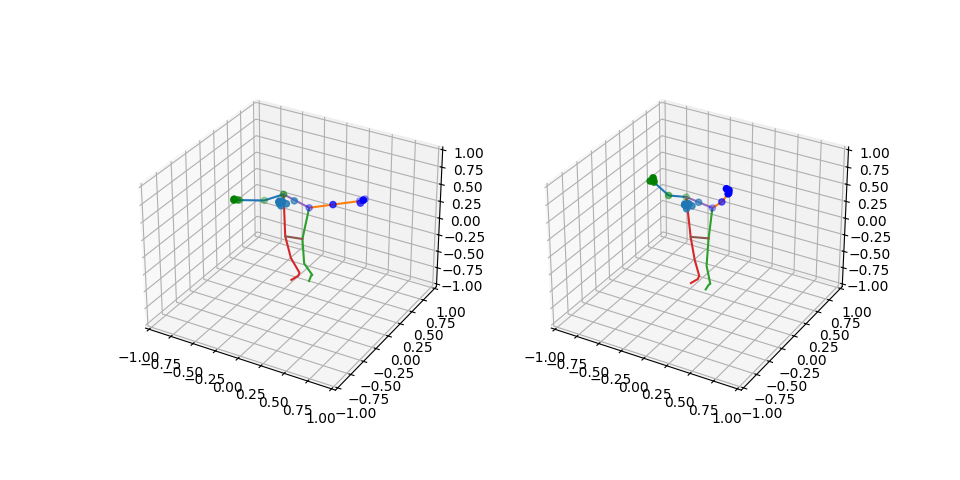

In [9]:
plot_world_landmarks(plt, ax1, lm3d)
plot_world_landmarks(plt, ax2, vlm3d)

In [6]:
plt.show()

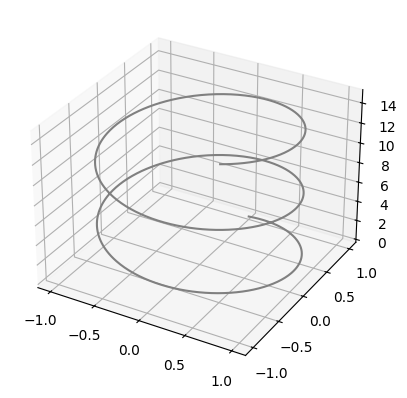

In [9]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')